In [1]:
import gymnasium as gym
import warnings
warnings.filterwarnings('ignore')
import torch
from collections import defaultdict
import random
import time
import matplotlib.pyplot as plt

In [2]:
env = gym.make('CliffWalking-v0')
env.reset()

(36, {'prob': 1})

In [3]:
def policy(eps, action_count, q_actions):
    probs = torch.ones(action_count) * eps / action_count
    best_action = torch.argmax(q_actions).item()
    probs[best_action] += 1.0 - eps
    action = torch.multinomial(probs, 1).item()
    return action

In [4]:
def policy_simple(eps, action_count, q_actions):
    random.seed(int( time.time())%1000)

    best_action = max(q_actions)
    best_action_idx = q_actions.index(best_action)
    q_var = [(eps / action_count) for i in range(action_count)]
    q_var[best_action_idx] += 1.0 - eps

    rnd = [random.random() for i in range(action_count)]

    q_var_m = [(rnd[i] * q_var[i]) for i in range(action_count)]

    best_action = max(q_var_m)
    best_action_idx = q_var_m.index(best_action)
   
    return best_action_idx

In [5]:
n_action = env.action_space.n
length_num = [0] * 1000
total_reward_num = [0] * 1000

gamma = 1
alpha = 0.4
eps = 0.1

Q = defaultdict(lambda: torch.zeros(n_action))

for num in range(1000):
    state = env.reset()[0]
    is_done = False
    is_break = False
    while not is_done and not is_break:
        action = policy(eps, n_action, Q[state])

        next_state, reward, is_done, is_break, _ = env.step(action)
        
        d_Q_s = alpha * (reward + gamma * torch.max(Q[next_state]) - Q[state][action])

        Q[state][action] += d_Q_s

        state = next_state

        length_num[num] += 1
        total_reward_num[num] += reward

policy = {}
for state, actions in Q.items():
    policy[state] = torch.argmax(actions).item()


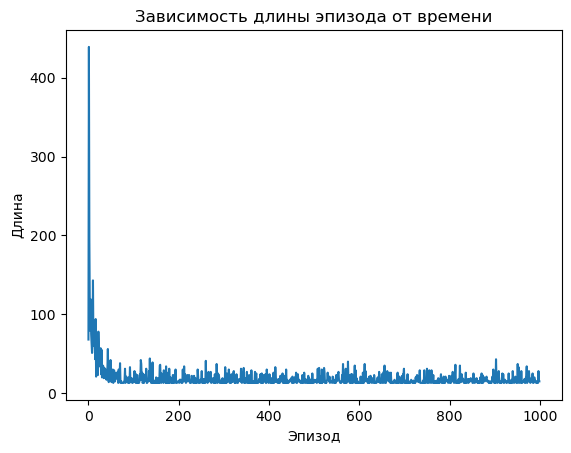

In [6]:
plt.plot(length_num)
plt.title('Зависимость длины эпизода от времени')
plt.xlabel('Эпизод')
plt.ylabel('Длина')
plt.show()

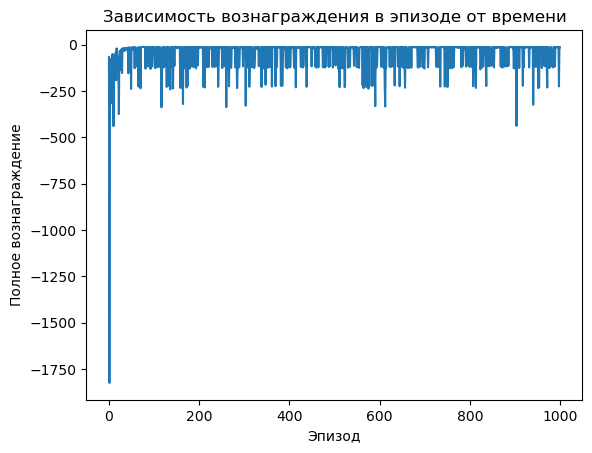

In [7]:
plt.plot(total_reward_num)
plt.title('Зависимость вознаграждения в эпизоде от времени')
plt.xlabel('Эпизод')
plt.ylabel('Полное вознаграждение')
plt.show()

In [8]:
env.close()
env = gym.make('CliffWalking-v0', render_mode='human')
env.reset()
env.render()

In [9]:
vl = [v for k, v in policy.items()]

In [10]:
sum_reward = 0
is_done = False
is_break = False
num_step = 0
action = 0
state = env.reset()[0]
while not is_done and not is_break: 
    action = policy[state]
    state, reward, is_done, is_break, info = env.step(action)
    sum_reward += reward

print("Final reward: ", reward)

Final reward:  -1
